# Introduction to Python for quantitative finance.


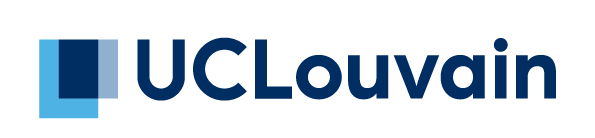



*Author* : Ubeydullah Ozcan (ozcanubey@outlook.com)

## Course 4 - Efficient frontier

### Efficient frontier

***Defintion*** : In modern portfolio theory, the efficient frontier (or portfolio frontier) is an investment portfolio which occupies the "efficient" parts of the risk–return spectrum. Formally, it is the set of portfolios which satisfy the condition that no other portfolio exists with a higher expected return but with the same standard deviation of return (i.e., the risk)





The graph below is the representation in term of risk-return of portfolios and for individual portfolios. The idea behind the efficient frontier is that it is impossible to reach this frontier by investing in indivual assets. 

![alternative text](Frontier.png)

There are 2 importants portfolio :

* Minimun Variance portfolio ==> $\omega^{MV}$, $\mu^{MV}$, $\sigma^{MV}$
* Maximum Sharpe-Ratio portfolio ==> $\omega^{SR}$, $\mu^{SR}$, $\sigma^{SR}$

The Sharpe ratio of a portfolio is the excess-rate-of-return per unit of risk 
$$S = \frac{\mu - r}{\sigma} $$
$\mu - r$ is the excess rate-of-return : difference between the portfolio's expected return and the return r of the risk-free asset.

Risk ($\sigma^2$) is measured throuhg standard deviation of the portfolio

* S < 1 : less interesting than risk-free asset when accounting for risk
* S >= 2 : 1% of volatility generates an excess return of 2%

## Notation

Let's first recall some important notation.

 The expected return of the portfolio is calculated as follow :
* $E[R_p] =  \omega^T R$

with $R = \begin{pmatrix} R_1 \\ R_2 \\ ... \\ R_n \end{pmatrix}$ and $\omega = \begin{pmatrix} \omega_1 \\ \omega_2 \\ ... \\ \omega_n \end{pmatrix}$ and $R_{p}$ is the return on the portfolio, $R_{i}$ is the return on asset i and $w_{i}$ is the weighting of component asset i (that is, the proportion of asset "i" in the portfolio, so that $\sum _{i}w_{i}=1$

* $\sigma_p^2 = \omega^T \Sigma$ $\omega$

with $\Sigma$ the variance-covariance matrix.

## How to build the efficient frontier ?

There are 2 methodologies to build the efficient frontier :

- By optimization,
- By simulation


### Method 1 : Optimization

We can build the frontier by solving the following optimization program :

$$\underset{w}{minimize} \: \: \: w^T \Sigma w$$ 
$$\text{subject to} \: \: \: \mu * w \geq r_{min} $$
$$ w \geq 0 $$
$$ 1^T w = 1 $$

We will solve this problem for a set of $r_{min}$ which will go from $\mu^{MV}$ to $\mu^{SR}$. The set of solution ${\omega_1, \omega_2, \omega_3, ..., \omega_m}$ will help to build the set of $\mu$ and $\sigma$ to build efficient frontier.

#### Optimization program to find the minimum variance portfolio

$$\underset{w}{minimize} \: \: \: w^T \Sigma w$$ 
$$ w \geq 0 $$
$$ 1^T w = 1 $$

The solution of this problem will give you $\omega^{MV}$ and using this we can calculate $\mu^{MV}$ and $\sigma^{MV}$

#### Optimization program to find the maximum sharpe ratio portfolio

$$\underset{w}{minimize} \: \: \: - SR(w)$$ 
$$ w \geq 0 $$
$$ 1^T w = 1 $$
The solution of this problem will give you $\omega^{SR}$ and using this we can calculate $\mu^{SR}$ and $\sigma^{SR}$

### Method 2 : Simulation

The idea of building the efficient frontier using simulation is to simulate a very large number of possible portfolio which will lead us to obtain the efficient frontier by definition. As reminder, an efficient portfolio is a portfolio that gives the maximum return for a certain level of volatility. 



### Code

#### Method 1 : Optimization - Python implementation

In [74]:
from os import name
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import math
import scipy.optimize as sc
import plotly.graph_objects as go

Let's first create all the functions we need to do the optimization program :

#### ***Download the data***

In [24]:
def getData(stocks:list, start, end):
    prices = pd.DataFrame()
    for i in stocks:
        prices = pd.concat([prices, pd.DataFrame(yf.download(i, start, end)["Close"])], axis=1)
    prices.columns = stocks
    returns = prices.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return prices, returns, meanReturns, covMatrix

In [25]:
my_ptf = ['CBA.AX', 'BHP.AX', 'TLS.AX']

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365)

prices, returns, meanReturns, covMatrix = getData(stocks=my_ptf,
                                                  start=startDate,
                                                  end=endDate)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


The function `getData()` has 3 arguments : 
- `stocks` as a ***list***,
- `start` as ***datetime***,
- `end` as ***datetime***

and it returns 4 outputs :
- DataFrame of prices,
- DataFrame of returns,
- Vector of returns,
- Matrix of variance-covariance.


#### ***Portfolio Mean and standard deviation of return calculation***

In [26]:
def portfolioPerformance(weights:np.array, meanReturns:np.array, covMatrix:np.matrix):
    returns = np.sum(meanReturns * weights) * 252
    std = np.sqrt(
        np.dot(weights.T, np.dot(covMatrix, weights))
    ) * np.sqrt(252)
    return returns, std

In [35]:
w_example = np.array([0.33, 0.33, 0.34])
mu_example, sigma_example = portfolioPerformance(weights=w_example, meanReturns= meanReturns, covMatrix=covMatrix)
print(mu_example, sigma_example)

0.037088811735213 0.11667474590855802


The function `portfolioPerformance()` has 3 arguments :
- `weights` as numpy vector of weights by asset,
- `meanReturns` as numpy vector of returns of returns of each asset,
- `covMatrix` as numpy matrix of variance-covariacne of each asset.

and it returns 2 outputs :
- portfolio return,
- portfolio standard deviation


#### ***Portfolio Sharpe Ratio calculation***

In [28]:
def negativeSR(weights, meanReturns, covMatrix, riskFreeRate:float = 0):
    pReturns, pStd = portfolioPerformance(weights, meanReturns, covMatrix)
    return - (pReturns - riskFreeRate) / pStd

In [34]:
sr_negative_example = negativeSR(weights=w_example, meanReturns=meanReturns, covMatrix=covMatrix)
print(sr_negative_example)

-0.317882087048047


The function `negativeSR()` has 4 arguments :
- `weights` as numpy vector of weights by asset,
- `meanReturns` as numpy vector of returns of returns of each asset,
- `covMatrix` as numpy matrix of variance-covariacne of each asset.
- `riskFreeRate` as float which is the rish free rate

and it returns 1 output :
- The negative Sharpe-Ratio

The reason why we are computing the negative Sharpe-Ratio it will just facilitate the optimization program.

In [31]:
def portfolioReturn(weights, meanReturns, covMatrix):
    return portfolioPerformance(weights, meanReturns, covMatrix)[0]

def portfolioVariance(weights, meanReturns, covMatrix):
    return portfolioPerformance(weights, meanReturns, covMatrix)[1]

In [33]:
mu_example = portfolioReturn(weights=w_example, meanReturns=meanReturns, covMatrix=covMatrix)
sigma_example = portfolioVariance(weights=w_example, meanReturns=meanReturns, covMatrix=covMatrix)
print(mu_example, sigma_example)

0.037088811735213 0.11667474590855802


The 2 functions above `portfolioReturn` and `portfolioVariance` they just compute the return and variance of the portfolio.

They have 3 arguments :
- `weights` as numpy vector of weights by asset,
- `meanReturns` as numpy vector of returns of returns of each asset,
- `covMatrix` as numpy matrix of variance-covariacne of each asset.

#### ***Optimization program to find minimum variance portfolio***

Now, let's build the functions which will do the optimization program to find the portfolio ($\omega^{MV}$) which have the minimum variance

In [36]:
def minimizeVariance(meanReturns, covMatrix, constraintSet=(0, 1)):
    """Minimize the portfolio variance by altering the 
     weights/allocation of assets in the portfolio"""
    numAssets = len(meanReturns)
    args = (meanReturns, covMatrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = constraintSet
    bounds = tuple(bound for asset in range(numAssets))
    result = sc.minimize(portfolioVariance, numAssets * [1. / numAssets], args=args,
                         method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [37]:
w_mv = minimizeVariance(meanReturns=meanReturns, covMatrix=covMatrix)
print(w_mv)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.10686011782447201
       x: [ 2.651e-01  1.672e-01  5.677e-01]
     nit: 8
     jac: [ 1.068e-01  1.070e-01  1.069e-01]
    nfev: 32
    njev: 8


The function `minimizeVariance()` has 3 arguments :
- `meanReturns` as numpy vector of returns of returns of each asset,
- `covMatrix` as numpy matrix of variance-covariacne of each asset.
- `constraintSet` as tuple to define the set where to algorithm will search the solution

and it returns 1 output :
- a list of weights which is $\omega^{MV}$

#### ***Optimization program to find maximum sharpe ratio portfolio***

Now, let's build the functions which will do the optimization program to find the portfolio ($\omega^{SR}$) which have the maximum sharpe-ratio

In [41]:
def maxSR(meanReturns, covMatrix, riskFreeRate=0, constraintSet=(0, 1)):
    "Minimize the negative SR, by altering the weights of the portfolio"
    numAssets = len(meanReturns)
    args = (meanReturns, covMatrix, riskFreeRate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = constraintSet
    bounds = tuple(bound for asset in range(numAssets))
    result = sc.minimize(negativeSR, numAssets * [1. / numAssets], args=args,
                         method='SLSQP', bounds=bounds, constraints=constraints)
    return result

The function `maxSR()` has 3 arguments :
- `meanReturns` as numpy vector of returns of returns of each asset,
- `covMatrix` as numpy matrix of variance-covariacne of each asset.
- `riskFreeRate` as float which is the rish free rate
- `constraintSet` as tuple to define the set where to algorithm will search the solution

and it returns 1 output :
- a list of weights which is $\omega^{SR}$

In [40]:
w_sr = maxSR(meanReturns=meanReturns, covMatrix=covMatrix)
print(w_sr)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.48729862226703
       x: [ 4.750e-01  5.250e-01  5.291e-17]
     nit: 5
     jac: [-3.441e-04  3.113e-04  2.955e-01]
    nfev: 20
    njev: 5


### ***Optimization program to build the frontier from Min Variance to Max Sharpe Ratio***


By definition, the efficient frontier gives you the maximum return for a return level of return. In order term, the efficient frontier is all the portfolio that minimum the standard deviation for a given target return.

In [48]:
def efficientOpt(meanReturns, covMatrix, returnTarget, constraintSet=(0, 1)):
    """For each returnTarget, we want to optimise the portfolio for min variance"""
    numAssets = len(meanReturns)
    args = (meanReturns, covMatrix)

    constraints = ({'type': 'eq', 'fun': lambda x: portfolioReturn(x, meanReturns, covMatrix) - returnTarget},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = constraintSet
    bounds = tuple(bound for asset in range(numAssets))
    effOpt = sc.minimize(portfolioVariance, numAssets * [1. / numAssets], args=args, method='SLSQP', bounds=bounds,
                         constraints=constraints)
    return effOpt

The target return to build the efficient frontier will be all the return from the return of minimum variance portfolio to the return of maximum sharpe ratio portfolio. For each target return, we will solve the optimization problem and find portfolio. At the end, the all set of portfolio will create the efficient frontier. This will be done in the next function  : 

In [49]:
def calculatedResults(meanReturns, covMatrix, riskFreeRate=0, constraintSet=(0, 1)):
    """Read in mean, cov matrix, and other financial information
        Output, Max SR , Min Volatility, efficient frontier """
    # Max Sharpe Ratio Portfolio
    maxSR_Portfolio = maxSR(meanReturns, covMatrix)
    maxSR_returns, maxSR_std = portfolioPerformance(maxSR_Portfolio['x'], meanReturns, covMatrix)
    maxSR_allocation = pd.DataFrame(maxSR_Portfolio['x'], index=meanReturns.index, columns=['allocation'])
    maxSR_allocation.allocation = [round(i * 100, 0) for i in maxSR_allocation.allocation]

    # Min Volatility Portfolio
    minVol_Portfolio = minimizeVariance(meanReturns, covMatrix)
    minVol_returns, minVol_std = portfolioPerformance(minVol_Portfolio['x'], meanReturns, covMatrix)
    minVol_allocation = pd.DataFrame(minVol_Portfolio['x'], index=meanReturns.index, columns=['allocation'])
    minVol_allocation.allocation = [round(i * 100, 0) for i in minVol_allocation.allocation]

    # Efficient Frontier
    efficientList = []
    targetReturns = np.linspace(minVol_returns, maxSR_returns*1.1, 20)
    for target in targetReturns:
        efficientList.append(efficientOpt(meanReturns, covMatrix, target)['fun'])

    maxSR_returns, maxSR_std = round(maxSR_returns * 100, 2), round(maxSR_std * 100, 2)
    minVol_returns, minVol_std = round(minVol_returns * 100, 2), round(minVol_std * 100, 2)
    return maxSR_returns, maxSR_std, maxSR_allocation, minVol_returns, minVol_std, minVol_allocation, efficientList, targetReturns


This function will wrapped up everything above to compute all the result in once. `calculatedResults()` needs 4 arguments :
- `meanReturns` as numpy vector of returns of returns of each asset,
- `covMatrix` as numpy matrix of variance-covariacne of each asset.
- `riskFreeRate` as float which is the rish free rate
- `constraintSet` as tuple to define the set where to algorithm will search the solution

and it will return 
- Return, Std and $\omega$ for the portfolio that maximize the Sharpe_ratio,
- Return, Std and $\omega$ for portfolio that minimize the volatility,
- TargetReturns which are all the returns for which we want to minimize the volatility,
- EfficientList which is the list of minimum volatility coming from the optimization program which minimize the volatility for a target return

TargetReturn and EfficientList are respectivily the y and x of the efficient frontier.


In [51]:
maxSR_returns, maxSR_std, maxSR_allocation, minVol_returns, minVol_std, minVol_allocation,\
      efficientList, targetReturns = calculatedResults(meanReturns=meanReturns, covMatrix=covMatrix)

In [54]:
print(maxSR_returns, maxSR_std, maxSR_allocation)
print(minVol_returns, minVol_std, minVol_allocation)

7.49 15.38         allocation
CBA.AX        48.0
BHP.AX        52.0
TLS.AX         0.0
1.04 10.69         allocation
CBA.AX        27.0
BHP.AX        17.0
TLS.AX        57.0


### Method 2 : Simulation - Python implementation

In [55]:
def simulate(stocks, meanReturns, covMatrix, n_sim, riskFreeRate=0):
    numAssets = len(meanReturns)
    simulated_ptf_return = []
    simulated_ptf_std = []
    simulated_sharpe_ratio = []
    w = np.zeros((n_sim, numAssets))
    portfolio = pd.DataFrame()
    for i in np.arange(n_sim):
        weights = np.array(np.random.random(numAssets))
        weights = weights / np.sum(weights)
        simulated_ptf_return.append(np.sum(weights * meanReturns) * 252)
        simulated_ptf_std.append(np.sqrt(
            np.dot(weights.T, np.dot(covMatrix, weights))) * np.sqrt(252))
        simulated_sharpe_ratio.append((simulated_ptf_return[i] - np.array(riskFreeRate)) / simulated_ptf_std[i])
        w[i, :] = weights
    for i in range(numAssets):
        if i == 0:
            portfolio = pd.DataFrame({stocks[i]: w[:, i]})
        else:
            portfolio[stocks[i]] = w[:, i]
    portfolio['Return'] = simulated_ptf_return
    portfolio['Volatility'] = simulated_ptf_std
    portfolio['Sharpe Ratio'] = simulated_sharpe_ratio
    return portfolio

In [68]:
simulated_portfolios = simulate(stocks=my_ptf, meanReturns=meanReturns, covMatrix=covMatrix, n_sim=10000)

In [69]:
index = simulated_portfolios["Sharpe Ratio"].idxmax()
result = pd.DataFrame(simulated_portfolios.iloc[index])
result.columns = ['Result max Sharpe Ratio']
result

,Result max Sharpe Ratio
CBA.AX,0.514596
BHP.AX,0.485216
TLS.AX,0.000188
Return,0.073281
Volatility,0.150644
Sharpe Ratio,0.486450


In [70]:
index = simulated_portfolios["Volatility"].idxmin()
result2 = pd.DataFrame(simulated_portfolios.iloc[index])
result2.columns = ['Result min Volatility']
result2

,Result min Volatility
CBA.AX,0.270660
BHP.AX,0.165453
TLS.AX,0.563887
Return,0.010664
Volatility,0.106863
Sharpe Ratio,0.099796


In [71]:
final_result = result.join(result2)
final_result

,Result max Sharpe Ratio,Result min Volatility
CBA.AX,0.514596,0.270660
BHP.AX,0.485216,0.165453
TLS.AX,0.000188,0.563887
Return,0.073281,0.010664
Volatility,0.150644,0.106863
Sharpe Ratio,0.486450,0.099796


Let's finally build the graph which put all together the optimization and the simulation method.

In [75]:
def EF_graph(stocks, n_sim, meanReturns, covMatrix, riskFreeRate=0, constraintSet=(0, 1)):
    """Return a graph ploting the min vol, max sr and efficient frontier"""
    maxSR_returns, maxSR_std, maxSR_allocation, minVol_returns, minVol_std, minVol_allocation, efficientList, targetReturns = calculatedResults(
        meanReturns, covMatrix, riskFreeRate, constraintSet)
    portfolio = simulate(stocks, meanReturns, covMatrix, n_sim)

    # Efficient Frontier
    EF_curve = go.Scatter(
        name='Efficient Frontier',
        mode='lines',
        x=[round(ef_std * 100, 2) for ef_std in efficientList],
        y=[round(target * 100, 2) for target in targetReturns],
        line=dict(color='black', width=4, dash='dashdot')
    )

    # Max SR
    MaxSharpeRatio = go.Scatter(
        name='Maximium Sharpe Ratio',
        mode='markers',
        x=[maxSR_std],
        y=[maxSR_returns],
        marker=dict(color='red', size=14, line=dict(width=3, color='black'))
    )

    # Min Vol
    MinVol = go.Scatter(
        name='Mininium Volatility',
        mode='markers',
        x=[minVol_std],
        y=[minVol_returns],
        marker=dict(color='green', size=14, line=dict(width=3, color='black'))
    )


    #Simulated Portfolio
    sim_plot = go.Scatter(
        name='Simulate Ptfs',
        mode='markers',
        x=round(portfolio['Volatility'] * 100, 2),
        y=round(portfolio['Return'] * 100, 2),
        marker=dict(
            color=round(portfolio['Sharpe Ratio'] * 100, 2),
            showscale=True
        )

    )

    data = [MaxSharpeRatio, MinVol, EF_curve, sim_plot]

    layout = go.Layout(
        title='Portfolio Optimisation with the Efficient Frontier',
        yaxis=dict(title='Annualised Return (%)'),
        xaxis=dict(title='Annualised Volatility (%)'),
        showlegend=True,
        legend=dict(
            x=0.75, y=0, traceorder='normal',
            bgcolor='#E2E2E2',
            bordercolor='black',
            borderwidth=2),
        width=800,
        height=600)

    fig = go.Figure(data=data, layout=layout)
    return fig.show()

In [77]:
EF_graph(stocks=my_ptf, n_sim=10000, meanReturns=meanReturns, covMatrix=covMatrix)